In [7]:
import fsc
from fsc.devices import w7x
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [8]:
fsc.resolve.importOfflineData("../w7x.fsc")

In [9]:
tracer = fsc.tracer()

In [4]:
geoGrid = w7x.defaultGeometryGrid
#geometry = tracer.indexGeometry(w7x.op12Geometry(), grid = geoGrid)
#geometry
geometry = w7x.op12Geometry()

In [5]:
fsc.data.writeArchive(geometry.geometry, 'geometry.fsc')

In [10]:
geoGrid = w7x.defaultGeometryGrid
geometry = fsc.Geometry(fsc.data.readArchive('geometry.fsc'))

In [11]:
archiveCoils = fsc.data.readArchive("cadCoils.fsc")
config = w7x.standard(coils = archiveCoils)
grid = w7x.defaultGrid.clone()
grid.nR = 128
grid.nZ = 128
grid.nPhi = 32

In [6]:
points = np.linspace([6.1, 0.0, 0.0], [6.3, 0, 0], 5, axis = 1)
result = tracer.trace(points, config, grid = grid, geometryGrid = geoGrid, geometry = geometry, distanceLimit = 1e3, collisionLimit = 1, phiPlanes = [0])

In [7]:
result['endTags']

{'name': array([(notSet = void), (notSet = void), (notSet = void),
        (text = "Divertor TDU"), (text = "OP1.2 Heat Shield")],
       dtype=object),
 'w7x-component-id': array([(notSet = void), (notSet = void), (notSet = void), (uInt64 = 166),
        (uInt64 = 330)], dtype=object)}

In [9]:
result['stopReasons'] == 'collisionLimit'

array([False, False, False,  True,  True])

In [19]:
phi = 0
r1 = 5.3
r2 = 5.9
z1 = -1
z2 = -0.75
r = np.linspace(r1, r2, 120)
z = np.linspace(z1, z2, 50)

gr, gz = np.meshgrid(r, z, indexing='ij')

gx = np.cos(phi) * gr
gy = np.sin(phi) * gr

clenf = tracer.connectionLength(np.asarray([gx, gy, gz]), config, grid = grid, geometry = geometry, geometryGrid = geoGrid, distanceLimit = 1e3)
clenb = tracer.connectionLength(np.asarray([gx, gy, gz]), -config, grid = grid, geometry = geometry, geometryGrid = geoGrid, distanceLimit = 1e3)

(-1.0, -0.75)

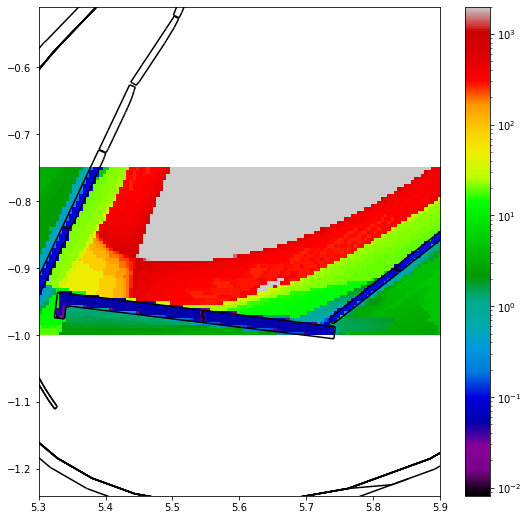

In [22]:
plt.figure(figsize = (9, 9))
plt.imshow((clenf + clenb).T[::-1], norm = matplotlib.colors.LogNorm(), extent = [r1, r2, z1, z2], cmap = 'nipy_spectral')
fsc.geometry.plotCut(geometry, phi = 0, edgecolors = 'k')
plt.colorbar()
plt.axis('equal')
plt.xlim(r1, r2)
plt.ylim(z1, z2)

In [8]:
clenf

array([1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099998,
       1000.00099998, 1000.00099998, 1000.00099998, 1000.00099

In [10]:
result

{'endPoints': array([[-5.09793552e+00, -5.64143176e+00, -4.66638708e+00,
          1.68779589e+00,  4.37435850e+00],
        [ 1.57153442e+00, -4.31742334e-01, -2.41026015e+00,
          5.32633131e+00,  4.25003919e+00],
        [ 6.38442786e-01,  1.38859116e-01, -8.76149416e-01,
          9.71815622e-01,  4.56341346e-01],
        [ 1.00000100e+03,  1.00000100e+03,  1.00000100e+03,
          7.71195325e+00,  4.78330385e+00]]),
 'poincareHits': array([[[[ 6.00267613e+00,  5.82831337e+00,  5.75779262e+00,
            5.79912181e+00,  5.77840951e+00,  5.76919943e+00,
            5.90030262e+00,  6.06614948e+00,  6.07950607e+00,
            5.92388044e+00,  5.77839016e+00,  5.77163339e+00,
            5.80249646e+00,  5.75981391e+00,  5.81075052e+00,
            5.98011284e+00,  6.09812003e+00,  6.02386529e+00,
            5.84789008e+00,  5.75813112e+00,  5.79414192e+00,
            5.78537298e+00,  5.76271126e+00,  5.87745314e+00,
            6.05001402e+00,  6.08965834e+00,  5.94768536e

In [19]:
points = np.linspace([6.1, 0.0, 0.0], [6.3, 0, 0], 20, axis = 1)
pcPoints = tracer.poincareInPhiPlanes(points, [0.0], 500, config, grid, geometry = geometry, distanceLimit = 1e4, stepSize = 1e-3)

Tracing
Done


In [12]:
pcPoints.shape

(5, 1, 20, 138)

In [10]:
xl, yl, zl = fsc.geometry.planarCut(geometry, phi = 0)
rl = np.sqrt(xl**2 + yl**2)

(5.133072004841275, 6.490185362471348, -1.395068977566118, 1.395068977566118)

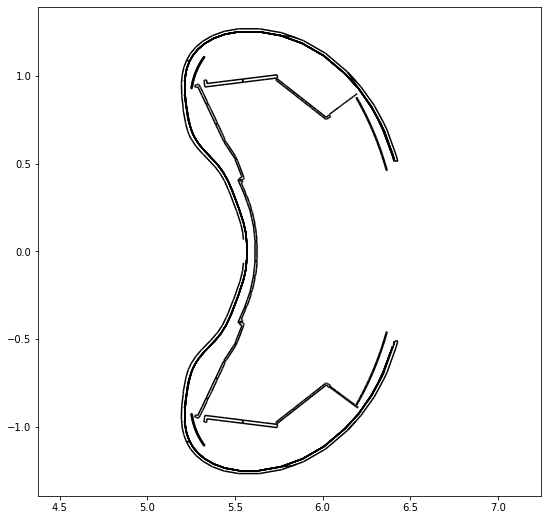

In [4]:
plt.figure(figsize = (9,9))
fsc.geometry.plotCut(geometry, phi = 0, edgecolors = 'k')
plt.axis('equal')

(-0.2, 0.2)

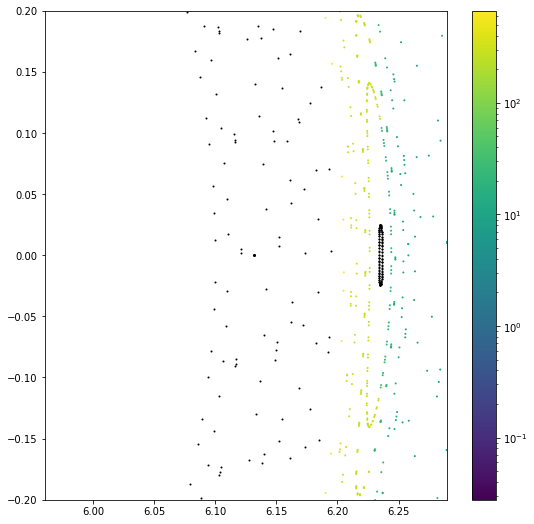

In [18]:
plt.figure(figsize = (9,9))

for v1, v2 in zip(rl, zl):
    plt.plot(v1, v2, c = "k")

x, y, z, lcf, lcb = pcPoints

lc = lcf + lcb

mask1 = np.logical_and(lcf > 0, lcb > 0)
mask2 = np.logical_and(lcf < 0, lcb < 0)

r = np.sqrt(x**2 + y**2)
plt.scatter(r[mask2], z[mask2], s = 1, c = 'k')
plt.scatter(r[mask1], z[mask1], s = 1, c = lc[mask1], norm=matplotlib.colors.LogNorm())

plt.axis('equal')
plt.colorbar()
plt.xlim(6, 6.25)
plt.ylim(-0.2, 0.2)

In [10]:
xl.shape

(224, 2)

In [15]:
help(fsc.native.FLTResponse)

Help on class FLTResponse in module fsc.native:

class FLTResponse(builtins.object)
 |  Static methods defined here:
 |  
 |  __init__ = (...) from builtins.PyCapsule
 |      () -> None
 |  
 |  newMessage(...) from builtins.PyCapsule
 |      newMessage() -> object
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  Builder = <class 'fsc.native.FLT.methods.trace.FLTResponse.Builder'>
 |  
 |  Pipeline = <class 'fsc.native.FLT.methods.trace.FLTResponse.Pipeline'>
 |  
 |  Promise = <class 'fsc.native.FLT.methods.trace.FLTResponse.Promise'>
 |  
 |  Reader = <class 'fsc.native.FLT.methods.trace.FLTResponse.Reader'>

